In [44]:
from sklearn.datasets import fetch_20newsgroups
from graph import *
from preprocess import words_lems, text_to_graph
import matplotlib
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (17, 5)

%matplotlib inline

%reload_ext autoreload
%autoreload 2

In [5]:
news_chunk = fetch_20newsgroups(subset="test")

In [7]:
len(news_chunk.data)

7532

In [46]:
news_chunk.data[1]

'From: Rick Miller <rick@ee.uwm.edu>\nSubject: X-Face?\nOrganization: Just me.\nLines: 17\nDistribution: world\nNNTP-Posting-Host: 129.89.2.33\nSummary: Go ahead... swamp me.  <EEP!>\n\nI\'m not familiar at all with the format of these "X-Face:" thingies, but\nafter seeing them in some folks\' headers, I\'ve *got* to *see* them (and\nmaybe make one of my own)!\n\nI\'ve got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")\nand I\'ve managed to compile [un]compface too... but now that I\'m *looking*\nfor them, I can\'t seem to find any X-Face:\'s in anyones news headers!  :-(\n\nCould you, would you, please send me your "X-Face:" header?\n\nI *know* I\'ll probably get a little swamped, but I can handle it.\n\n\t...I hope.\n\nRick Miller  <rick@ee.uwm.edu> | <ricxjo@discus.mil.wi.us>   Ricxjo Muelisto\nSend a postcard, get one back! | Enposxtigu bildkarton kaj vi ricevos alion!\n          RICK MILLER // 16203 WOODS // MUSKEGO, WIS. 53150 // USA\n'

In [54]:
text = news_chunk.data[1]

In [89]:
nlinks = 4

occs, words_map = text_to_graph(text, ignore_stopwords=True, self_links=False, nlinks=nlinks, return_words_map=True)
words_map_inv = {e[1]:e[0] for e in words_map.items()}
occs += occs.T

G = np_to_nx(occs, words_map)

print("Sparsity: {:05.2f}%".format(100 * sparsity(occs)))

Sparsity: 87.19%


In [90]:
cmap = {i: matplotlib.colors.to_hex(plt.cm.Set1.colors[i]) for i in range(len(plt.cm.Set1.colors))}

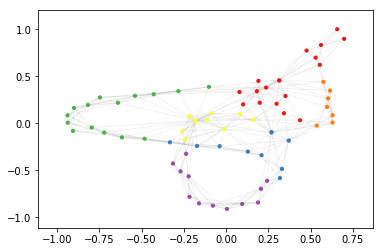

In [91]:
pos, partition, betweenness_scaled = communities(G, draw=True, cmap=cmap)

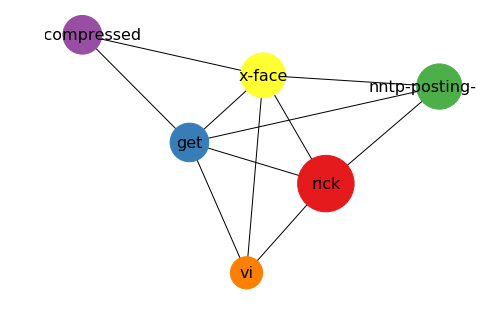

In [92]:
G_ind = induced_graph(G, partition, draw=True, cmap=cmap, words_map_inv=words_map_inv)